In [551]:
from qiskit.opflow import Z,I
from qiskit.algorithms import QAOA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import Aer
from qiskit.algorithms.optimizers import COBYLA

H1 = (Z^I^Z^I^I^I) + (Z^I^I^I^Z^I) + (Z^I^I^I^I^Z) + (I^Z^I^I^Z^I) + (I^Z^I^I^I^Z) + (Z^Z^I^I^I^I) +\
     (I^I^Z^Z^I^I) + (I^I^Z^I^Z^I) + (I^I^Z^I^I^Z) + (I^Z^I^Z^I^I) + (I^I^I^Z^Z^I) + (Z^I^I^Z^I^I)

C:\Users\Newt\AppData\Local\Temp\ipykernel_19488\3690957234.py:1: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(reps = 1)


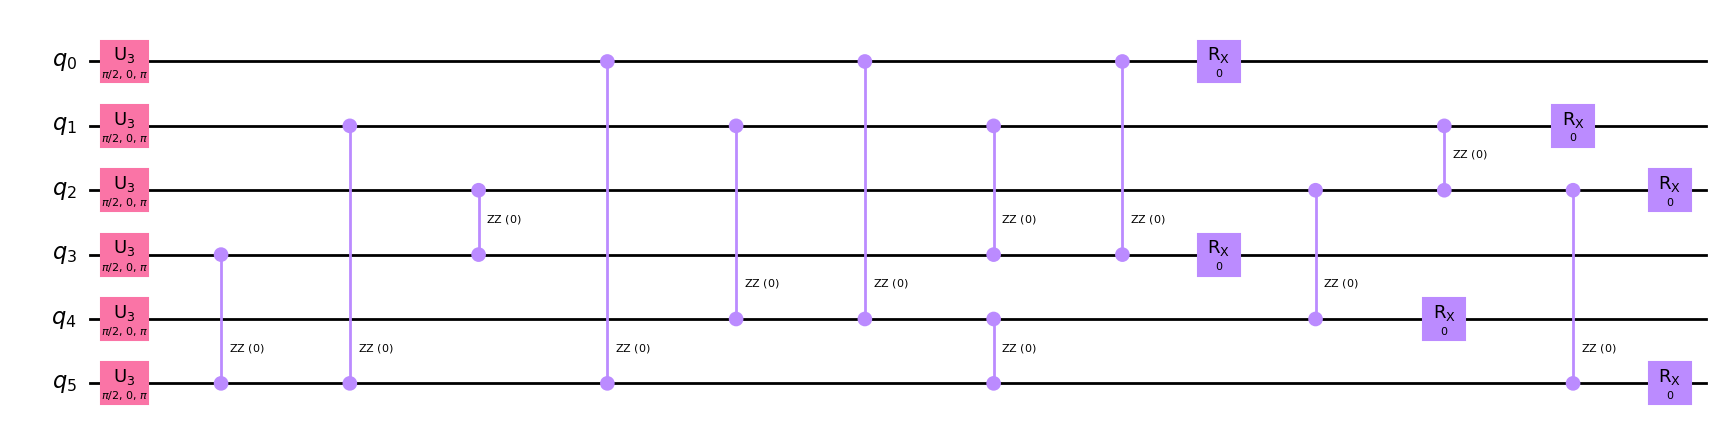

In [552]:
qaoa = QAOA(reps = 1)
circuit = qaoa.construct_circuit([0,0],H1)[0]
circuit.decompose().decompose().draw(output="mpl")

In [573]:
seed = 4096
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
seed_simulator=seed, seed_transpiler=seed,shots = 2048)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)

C:\Users\Newt\AppData\Local\Temp\ipykernel_19488\1373950224.py:3: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
C:\Users\Newt\AppData\Local\Temp\ipykernel_19488\1373950224.py:5: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)


In [574]:
b0, y0 = result.optimal_point[0], result.optimal_point[1]

In [575]:
print(b0, y0)

0.2824633518693277 6.069783473747127


In [576]:
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 34,
    'eigenstate': {   '000000': 0.02209708691207961,
                      '000001': 0.03125,
                      '000010': 0.03125,
                      '000011': 0.10597390598633231,
                      '000100': 0.03125,
                      '000101': 0.09110862335695782,
                      '000110': 0.08838834764831845,
                      '000111': 0.24407030237208294,
                      '001001': 0.03125,
                      '001010': 0.08838834764831845,
                      '001011': 0.1767766952966369,
                      '001100': 0.10126157341262282,
                      '001101': 0.17258376589355096,
                      '001110': 0.11899645477912357,
                      '001111': 0.125,
                      '010000': 0.02209708691207961,
                      '010001': 0.04419417382415922,
                      '010010': 0.07654655446197431,
                      '010011': 0.178152

In [577]:
import math
import matplotlib.pyplot as plt
import networkx as nx
from qiskit import *

n=6
pi = math.pi
q=QuantumRegister(n)
c=ClassicalRegister(n)
qc=QuantumCircuit(q,c)

a, y=b0*2, y0*2

for i in range(n):
    qc.h(i)

qc.cx(0,2)
qc.rz(a,2)
qc.cx(0,2)

qc.cx(0,4)
qc.rz(a,4)
qc.cx(0,4)

qc.cx(0,5)
qc.rz(a,5)
qc.cx(0,5)

qc.cx(1,4)
qc.rz(a,4)
qc.cx(1,4)

qc.cx(1,5)
qc.rz(a,5)
qc.cx(1,5)

qc.cx(2,3)
qc.rz(a,3)
qc.cx(2,3)

qc.cx(2,4)
qc.rz(a,4)
qc.cx(2,4)

qc.barrier()

qc.cx(2,5)
qc.rz(a,5)
qc.cx(2,5)

qc.barrier()

qc.cx(1,3)
qc.rz(a,3)
qc.cx(1,3)

qc.barrier()

qc.cx(3,4)
qc.rz(a,4)
qc.cx(3,4)

qc.barrier()

qc.cx(0,3)
qc.rz(a,3)
qc.cx(0,3)

qc.barrier()

qc.cx(0,1)
qc.rz(a,1)
qc.cx(0,1)

qc.barrier()

for i in range(n):
    qc.rx(y,i)

qc.barrier()

for i in range(n):
  qc.measure(q[i],c[i])

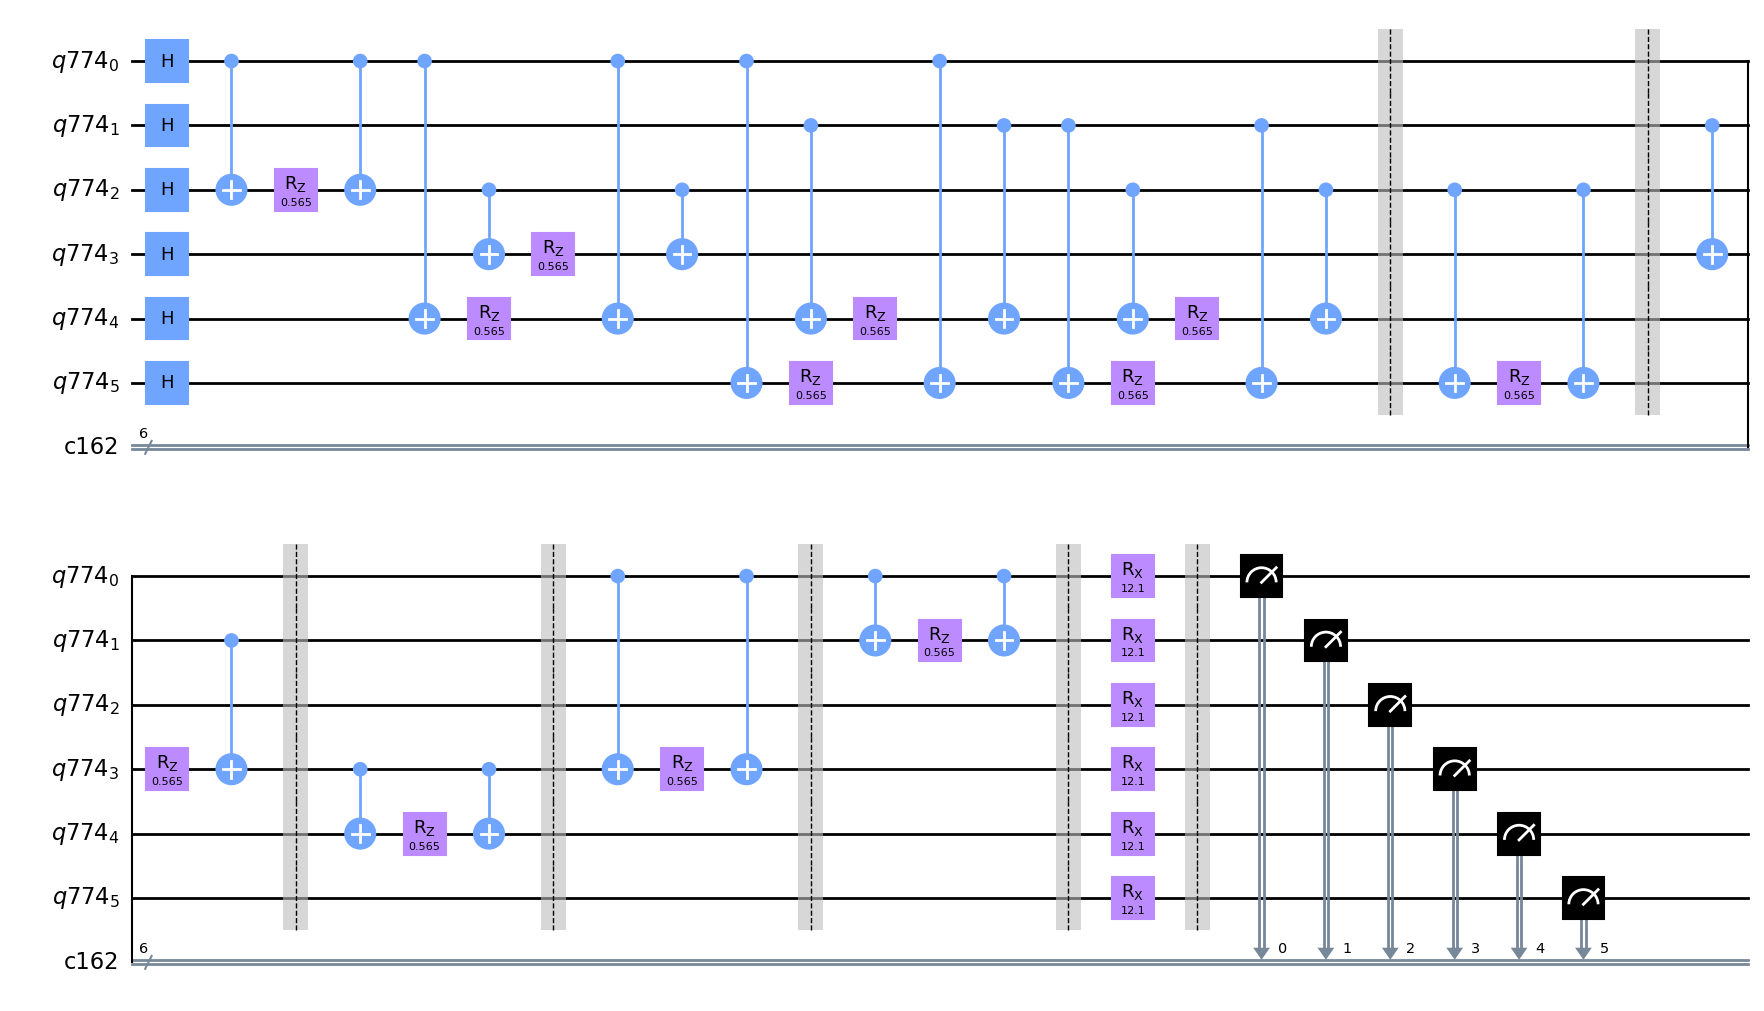

In [578]:
qc.draw(output="mpl")

In [579]:
sim = Aer.get_backend('aer_simulator')

res=execute(qc, backend=sim).result() 

In [580]:
res.get_counts()

{'010110': 48,
 '111000': 63,
 '110000': 10,
 '000111': 74,
 '001111': 12,
 '100110': 23,
 '111010': 13,
 '010101': 38,
 '111011': 4,
 '001110': 42,
 '100101': 21,
 '110110': 10,
 '101010': 41,
 '001100': 3,
 '111101': 5,
 '100011': 15,
 '101001': 45,
 '000101': 18,
 '101110': 23,
 '110010': 31,
 '110011': 7,
 '000100': 5,
 '101101': 5,
 '010011': 25,
 '010000': 4,
 '010001': 11,
 '111001': 20,
 '001011': 24,
 '100010': 1,
 '011010': 26,
 '000010': 3,
 '110101': 11,
 '101011': 7,
 '000011': 15,
 '110100': 31,
 '101100': 36,
 '011100': 19,
 '110001': 43,
 '000110': 16,
 '111100': 16,
 '001101': 25,
 '100100': 2,
 '011000': 8,
 '011110': 7,
 '011001': 29,
 '110111': 1,
 '000000': 9,
 '001001': 17,
 '010010': 7,
 '100111': 11,
 '011111': 9,
 '101000': 6,
 '100001': 3,
 '001010': 5,
 '111111': 2,
 '100000': 4,
 '010100': 8,
 '001000': 1,
 '010111': 3,
 '011101': 2,
 '011011': 1}

In [581]:
len(res.get_counts())

61

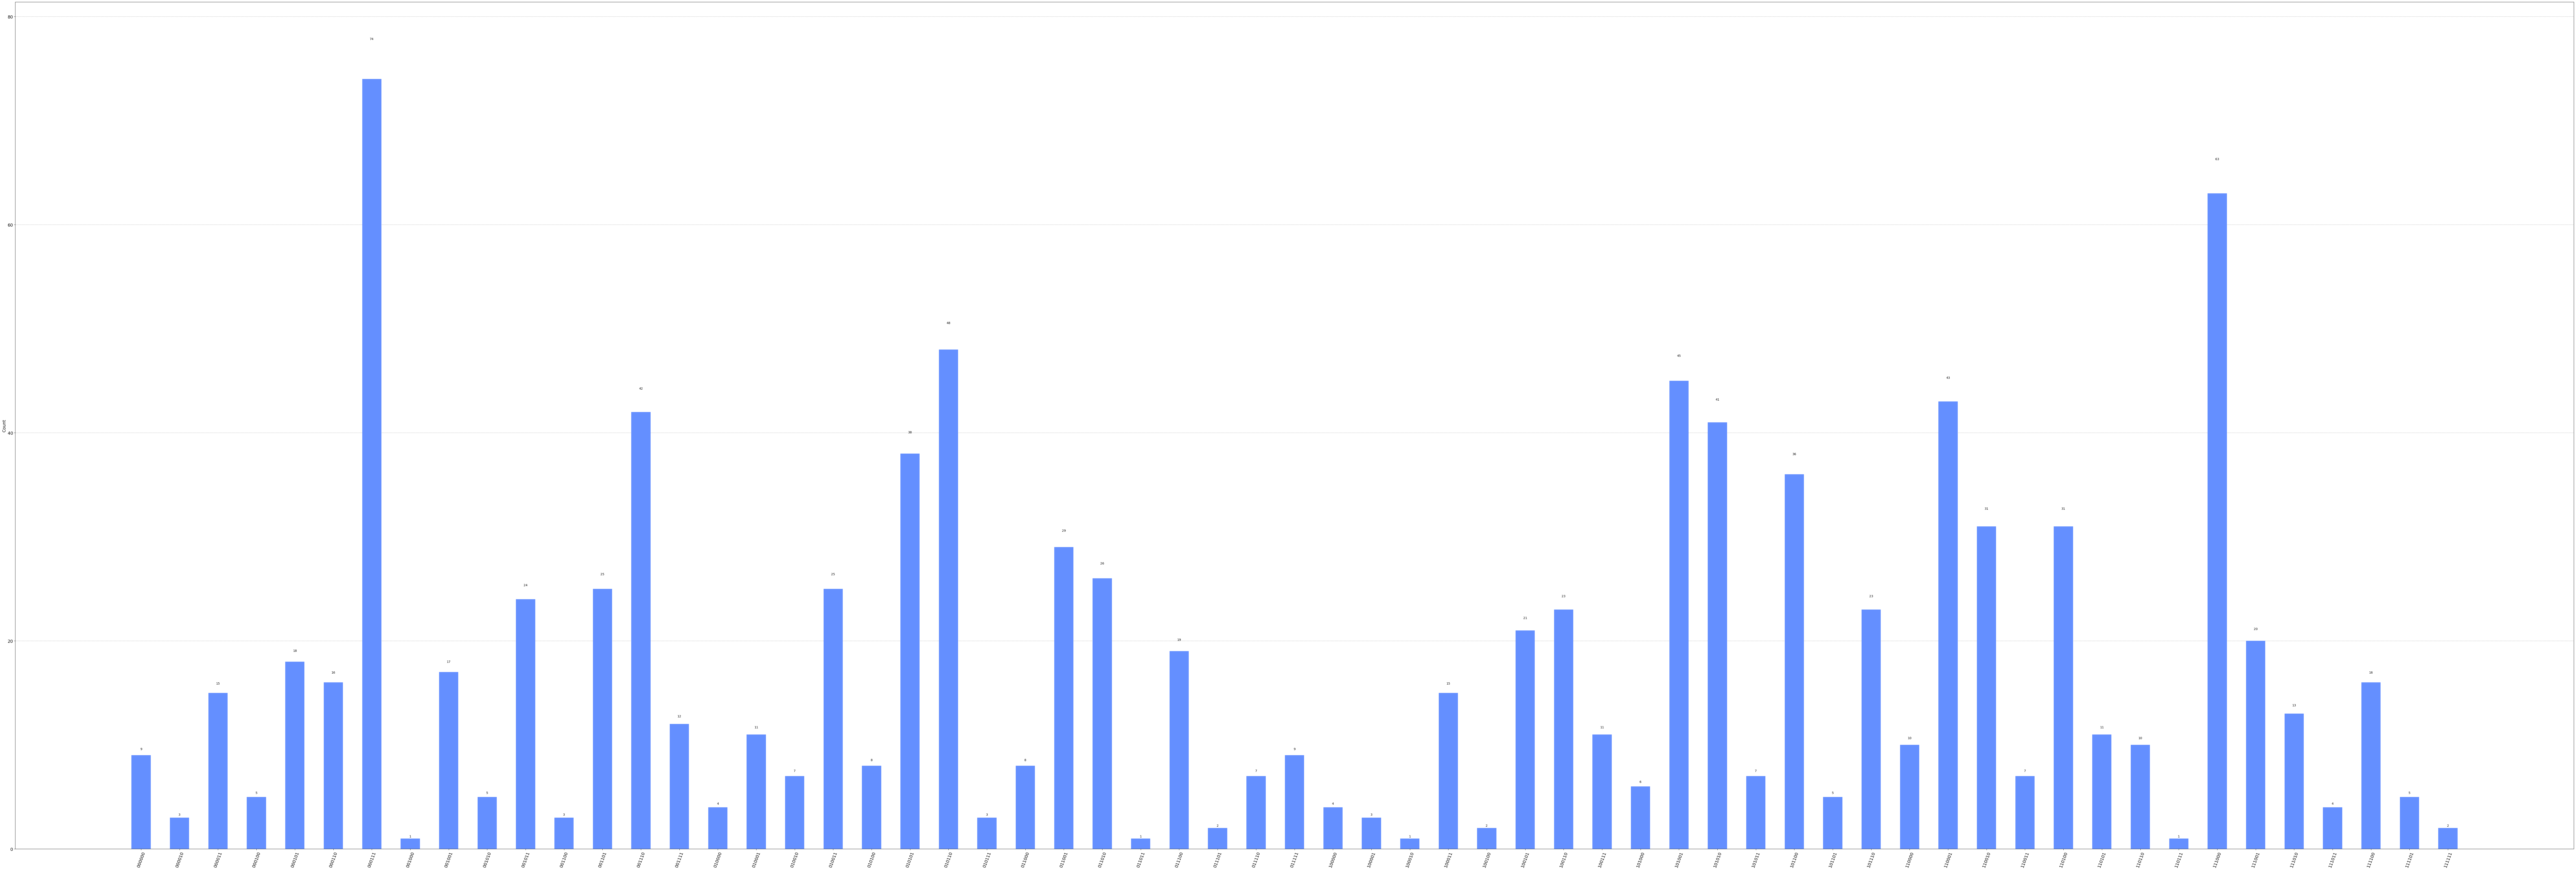

In [582]:
from qiskit.visualization import plot_histogram as ph
ph(res.get_counts(qc),figsize=(150,50))